In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Generate synthetic data (Replace with real structural data if available)
def generate_data(samples=200, features=10):
    np.random.seed(42)  # Ensuring reproducibility
    data = np.random.rand(samples, features)  # Random feature values
    labels = np.random.randint(0, 2, size=samples)  # 0 for healthy, 1 for damaged
    return data, labels

# Generate data
data, labels = generate_data()

# Split into training and testing sets (80% train, 20% test)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [4]:
class AIRS:
    def __init__(self, num_detectors=10, hypermutation_rate=0.1):
        self.num_detectors = num_detectors
        self.hypermutation_rate = hypermutation_rate

    def train(self, X, y):
        """Train the AIRS model using selected samples from the dataset."""
        self.detectors = X[np.random.choice(len(X), self.num_detectors, replace=False)]

    def predict(self, X):
        """Predict whether the given samples indicate structural damage."""
        predictions = []
        for sample in X:
            distances = np.linalg.norm(self.detectors - sample, axis=1)
            prediction = int(np.argmin(distances) < self.num_detectors // 2)  # Adjust detection criteria
            predictions.append(prediction)
        return np.array(predictions)


In [5]:
# Initialize and train AIRS model
airs = AIRS(num_detectors=10, hypermutation_rate=0.1)
airs.train(train_data, train_labels)

# Make predictions on the test data
predictions = airs.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(test_labels, predictions))

# Display confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37        20
           1       0.41      0.45      0.43        20

    accuracy                           0.40        40
   macro avg       0.40      0.40      0.40        40
weighted avg       0.40      0.40      0.40        40


Confusion Matrix:
[[ 7 13]
 [11  9]]


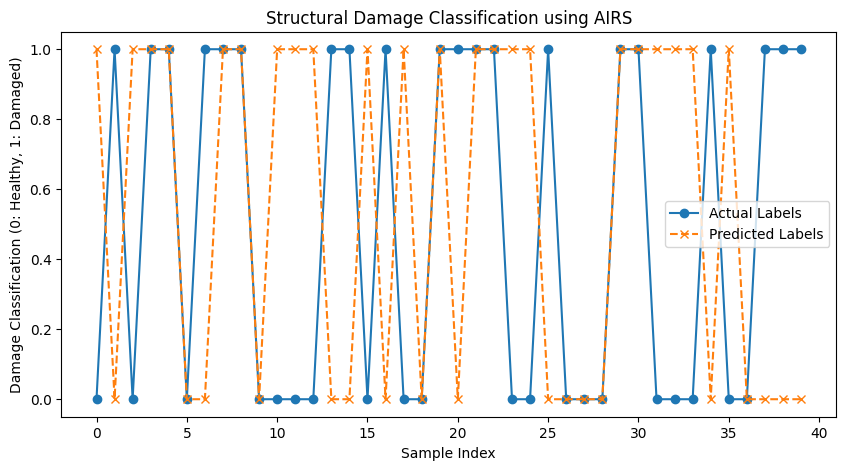

In [6]:
# Plot actual vs predicted labels
plt.figure(figsize=(10, 5))
plt.plot(test_labels, label="Actual Labels", marker='o')
plt.plot(predictions, label="Predicted Labels", linestyle="dashed", marker='x')
plt.title("Structural Damage Classification using AIRS")
plt.xlabel("Sample Index")
plt.ylabel("Damage Classification (0: Healthy, 1: Damaged)")
plt.legend()
plt.show()
